In [1]:
import pandas as pd
import numpy as np
import keras 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Using TensorFlow backend.


In [2]:
# Lee la tabla 'Churn.csv' y guárdala en una variable llamada clientes
clientes = pd.read_csv('datasets/Churn.csv')

# Muestra los primeros renglones
clientes.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Imprime el tamaño de la tabla clientes
clientes.shape
clientes.columns[3:13]

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [8]:
# Las columnas 'RowNumber','CustomerId','Surname' no son útiles para la predicción. 
# Guarda en una variable llamada X las columnas que sí nos pueden ayudar en la predicción columnas [3-12]
X = clientes[clientes.columns[3:13]]

In [9]:
# La variable que queremos predecir es 'Exited', que nos dice si un cliente dejó de comprar.
# Guardar esta columna en una variable llamada y
y = clientes[clientes.columns[-1]]

In [10]:
# Vamos a ver el tipo de datos de cada columna numérica. Hazlo con la función X.describe()
X.describe

<bound method NDFrame.describe of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
5             645     Spain    Male   44       8  113755.78              2   
6             822    France    Male   50       7       0.00              2   
7             376   Germany  Female   29       4  115046.74              4   
8             501    France    Male   44       4  142051.07              2   
9             684    France    Male   27       2  134603.88              1   
10            528    France    Male   31       6  102016.72              2   
11            497     Spain   

In [24]:
# Las columnas ['Geography', 'Gender'] son categóricas. Ve cuáles son las distintas categorías con
# X[col].count_values() para cada columna
X['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
# Cuenta los categorías de la segunda columna aquí
X['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
# Para convertir estas variables categóricas a numéricas vamos a utilizar pd.get_dummies()
# Guarda el resultado en la variable X_dummy
X_dummy = pd.get_dummies(X)

# Imprime las primeras filas
X_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [23]:
# Ahora vamos a poner todas las variables en la misma escala con StandardScaler()
# Las columnas CreditScore,Age,Tenure,Balance,NumOfProducts y EstimatedSalary son muy grandes comparadas con las demás columnas
# Usa StandardScaler en estas columnas
from sklearn.preprocessing import StandardScaler
scaler   = StandardScaler()
columns  = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

X_scaled = X_dummy.copy()
X_scaled.loc[:, columns] = scaler.fit_transform(   X_scaled.loc[:, columns]     )

# Imprime las primeras filas


C:\Users\Flags\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Flags\Miniconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
# Las columnas Gender_Female,Gender_Male son complementarias. Si un renglón tiene un valor de 1 en la columna Female
# en la columna Male el valor es 0. Entonces hay información redundante. ELimina una de estas columnas (la que quieras.)
X_scaled = X_scaled.drop(columns='Gender_Male')

In [27]:
# Algo similar pasa con las columnas de Geography_France,Geography_Germany, Geography_Spain. Elimina una de estas columnas
X_scaled = X_scaled.drop(columns='Geography_Spain')

In [28]:
X_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,1
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1


In [158]:
# Vamos ahora a partir la tabla para obtener el grupo de entrenamiento y el grupo de prueba.
# Utiliza train_test_split de sklearn.model_selection
# Los valores que vamos a partir son los de la última tabla (X_scaled)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(  X_scaled      , y, test_size = 0.3, random_state = 53)
y_train.shape

(7000,)

In [86]:
# Ahora vamos a crear la red neuronal
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [87]:
# Crea un modelo secuecial
modelo = Sequential()

In [88]:
# Agrega la primera capa al modelo. Recuerda que la primera capa tiene que conocer cuántas variables hay de entrada
# (Tip: cuántas columnas tiene X_train?)
# Usa la función de activación ReLu

input_shape = 11
modelo.add(Dense(units=11, activation='relu', input_shape= (input_shape, ))    )

In [89]:
# Agrega una o más capas más al modelo.
modelo.add(Dense(units=20, activation='relu'))
modelo.add(Dropout(0.1))
modelo.add(Dense(units=10, activation='relu'))

In [90]:
# Agrega la capa de salida. Este es un problema de clasificación. ¿Cuál es la función de activación correcta?
modelo.add(Dense(units=1, activation='sigmoid'))

In [91]:
# Ve un resumen del modelo con la función .summary()
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_25 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_4 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [151]:
# Ahora hay que compilar el modelo. 
# Utiliza el optimizador 'adam'. ¿Cuál es la función de costo correcta?
# Puedes escoger entre 'mse', 'binary_crossentropy', 'categorial_crossentropy'
modelo.compile(optimizer = 'adam'    , loss =  'binary_crossentropy', metrics = ['accuracy'])

In [152]:
# Ahora vamos a entrenar el modelo. Utiliza la variable history para guardar el progreso del modelo.
history = modelo.fit(X_train, y_train, batch_size =  64    , epochs =    40   , verbose= False)

KeyError: 'val_acc'

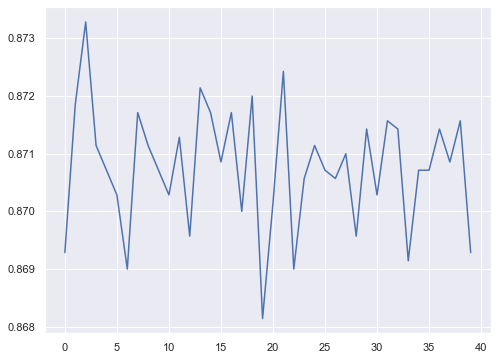

In [159]:
# Ejecuta la siguiente celda para ver el progreso del entrenamiento.

loss, accuracy  = modelo.evaluate(X_test, y_test, verbose=False)
# Graficar resultados
sns.set()
plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo durante entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
# plt.legend(['Entrenamiento', 'Validación'], loc='best')
plt.show()

print(f'Precisión en datos de prueba: {accuracy:.3}')

In [154]:
# Ahora vamos a utilizar los datos de prueba para ver que tan bueno es el modelo
# Usa el método predict para obtener los resultados de los datos X_tes
prediccion = modelo.predict( X_test     )

# Ahora define un punto de corte para asignar si el cliente va a abandonar o no.
corte = 0.3

y_pred = np.squeeze(1*(prediccion>corte))

In [155]:
y_test.shape

(3000,)

In [156]:
# Calcula la precisión con los datos de prueba. La precisión la puedes calcular con precision_score de sklearn.metrics 
from sklearn.metrics import precision_score
precision =   precision_score(y_test, y_pred)
print('Precisión:', precision)

Precisión: 0.5969387755102041


In [147]:
# Ahora veamos cómo se comparan los valores reales contra los predichos.
pd.crosstab(y_pred, y_test, rownames=['Predicción'], colnames=['Valor Real'])

# Qué pasa si cambias el punto de corte? Cambia el valor en las celdas anteriores y prueba otra vez.

Valor Real,0,1
Predicción,,
0,2126,233
1,273,368
